In [54]:
import os
from paths import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
compound_type = "global"
sheet_index = 2

sheet_name_list = ["Without outlier", "Without outlier-MS treated", "Without outlier-MS not treated",
                  "With outlier", "With outlier-MStreated", "With outlier-MS not treated"]
GLM_out_feces = pd.read_excel(os.path.join(OUTPUT_PATH, 'GLM_result_{}_compounds_feces_sample.xlsx'.format(compound_type)), engine='openpyxl', sheet_name=sheet_name_list[sheet_index])
GLM_out_serum = pd.read_excel(os.path.join(OUTPUT_PATH, 'GLM_result_{}_compounds_serum_sample.xlsx'.format(compound_type)), engine='openpyxl', sheet_name=sheet_name_list[sheet_index])



In [140]:
GLM_out_feces_significant = GLM_out_feces[(GLM_out_feces.pvalue < 0.05) & (GLM_out_feces.model_converged_flag==1)]
GLM_out_serum_significant = GLM_out_serum[(GLM_out_serum.pvalue < 0.05) & (GLM_out_serum.model_converged_flag==1)]
GLM_out_feces_serum_significant = pd.merge(GLM_out_feces_significant, GLM_out_serum_significant, on="analyte_name")[["analyte_name", "disease_coeff_x", "disease_coeff_y"]]
GLM_out_feces_serum_significant.rename(columns={"disease_coeff_x":"disease_coeff_feces", "disease_coeff_y":"disease_coeff_serum"}, inplace=True)
GLM_out_feces_serum_significant["disease_coeff_ratio"] = np.divide(GLM_out_feces_serum_significant.disease_coeff_feces, GLM_out_feces_serum_significant.disease_coeff_serum)
GLM_out_feces_serum_significant_flipped = GLM_out_feces_serum_significant[GLM_out_feces_serum_significant["disease_coeff_ratio"]<0]


In [141]:
GLM_out_feces_serum_significant_flipped[(GLM_out_feces_serum_significant_flipped["disease_coeff_feces"] < 0) & (GLM_out_feces_serum_significant_flipped["disease_coeff_serum"] > 0)].shape
sorted_df = GLM_out_feces_serum_significant_flipped.sort_values(by='disease_coeff_ratio', ascending=False)



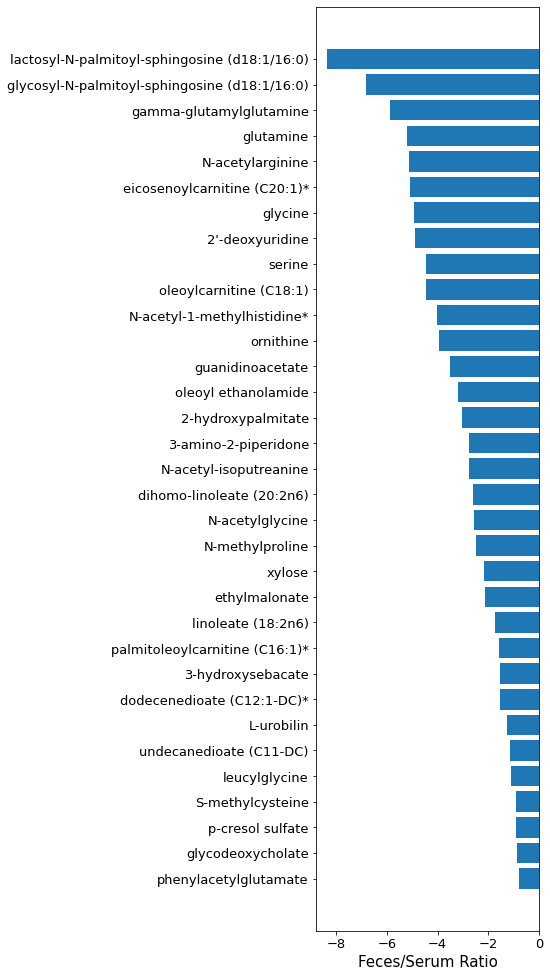

Saving the figure ...


In [142]:
FIG_SIZE = (4, 17)
FONTSIZE = 13
LABELSIZE = 15

filename_suffix_list = ["combined_population", "ms_treated_population", "ms_not_treated_population"]

fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.barh(sorted_df["analyte_name"], sorted_df["disease_coeff_ratio"])
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.xlabel('Feces/Serum Ratio', fontsize=LABELSIZE)
# plt.ylabel('Analyte name', fontsize=LABELSIZE)
plt.show()

print('Saving the figure ...')
fig_filename = os.path.join(OUTPUT_PATH, "figures", "compound_flip_ratio_between_samples_for_{}_compounds_for_{}.svg".format(compound_type, filename_suffix_list[sheet_index]))
fig.savefig(fig_filename, format='svg', bbox_inches='tight')



In [61]:
sorted_df

,analyte_name,disease_coeff_feces,disease_coeff_serum,disease_coeff_ratio
118,3-(3-hydroxyphenyl)propionate sulfate,0.051213,-0.159866,-0.320351
86,p-cresol sulfate,-0.134887,0.186801,-0.722088
16,palmitoleate (16:1n7),-0.098889,0.123773,-0.798955
124,phenylacetylglutamate,-0.157475,0.184263,-0.854622
138,deoxycholic acid 12-sulfate*,-0.184735,0.187066,-0.987539
...,...,...,...,...
133,N-acetyl-isoputreanine,-0.372156,0.051740,-7.192871
148,1-oleoyl-GPC (18:1),-0.373762,0.049284,-7.583915
143,glycerophosphorylcholine (GPC),-0.302264,0.031901,-9.475210
19,taurine,-0.391954,0.037183,-10.541252
